In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import copy

In [2]:
'''Defino las variables principales del modelo'''

n = 10
Porcentaje_A = 0.55

Vaa = -1
Vbb = -1
Vab = -2
u_a = 0.313
u_b = 0.703


In [3]:
Temp = []
Magnet = []
Energ = []
Energ_CM = []
Mallas_evo = []
Cambios = 0
operaciones = 300*n*n
barrido = np.linspace(4,0.1,100)

In [4]:
'''Genero la matriz que describe al sistema'''

Ca = int(np.floor(((n**2)*Porcentaje_A)))
Cb = int((n**2 - Ca))
VectorA = np.ones((Ca,1)).ravel()
VectorB = np.ones((Cb,1)).ravel() * (-1)
Total = np.hstack ((VectorA,VectorB))
Mix = np.random.shuffle(Total)     #Aleatorizo la malla
Malla = Total.reshape(n,n)

In [5]:
'''Calculo la energia del primer estado que genere'''

jota_base = (1/4) * (2 *Vab - Vaa - Vbb)
H_base = (1/2) * (u_a - u_b) 
Energia = 0
for i in range(n):
    for j in range(n):
        Energia += -jota_base * (Malla[i,j] *(Malla[i-1,j] + Malla[i,j-1])) - H_base * Malla[i,j] 

'''Guardo todos los valores que luego usare'''
Energia_T = copy.copy(Energia)
Energia_cuadrado_T = copy.copy(Energia**2)
Energia_previa = copy.copy(Energia)

In [6]:
from tqdm.notebook import tqdm_notebook

In [7]:
'''Obtengo la evolucion de la energia media en funcion de la temperatura y ordeno la malla'''
progress = tqdm_notebook(barrido, ncols=900)
for Temperatura in progress: #barrido:
    
    jota = jota_base 
    H = H_base * (-Energia_previa / Temperatura)  #Incorporo la evolucion de la temperatura en los potenciales del sistema
    
    for i in range(operaciones):
        
        Numero = np.random.rand(1)
        
        '''Selecciono atomos al azar en la matriz'''
        
        K = np.round(np.random.rand(1)*(n*n-1))
        J = np.floor(K/n).astype(int)
        I = (K - J * n).astype(int)
        
        L = np.round(np.random.rand(1)*(n*n-1))
        M = np.floor(L/n).astype(int)
        N = (L - M * n).astype(int)

        '''Veo si los atomos son los mismos o si son diferentes, en funcion de eso cambiara como encare el calculo de la energia'''
        
        P_C = Malla[M,N] * Malla[I,J]
        
        if P_C == 1:
            Variacion_de_energia = 0
            
        else:
            if abs((J+I) - (M+N)) == 1: #Veo si los atomos son o no primeros vecinos
                 
                 Malla_de_cambio = copy.copy(Malla)
                 aux1 = copy.copy(Malla_de_cambio[M,N])
                 aux2 = copy.copy(Malla_de_cambio[I,J])
                 Malla_de_cambio [I,J] = aux1
                 Malla_de_cambio [M,N] = aux2             
                 Energia_intermedia = 0
                
                 for i in range(n):
                     for j in range(n):
                         Energia_intermedia += -jota * (Malla_de_cambio[i,j] *(Malla_de_cambio[i-1,j] + Malla_de_cambio[i,j-1])) - H * Malla_de_cambio[i,j] 
                        
                 Variacion_de_energia = Energia_intermedia - Energia_previa 
                
            
            else:
                Variacion_de_energia1 = (2 * jota * Malla[I,J] * (Malla[I,J-1] + Malla[I-1,J] 
                                                                      + Malla[I,J+1-n] + Malla[I+1-n,J])
                                                                         - 2 * H * Malla[I,J] )
                
                Variacion_de_energia2 = (2 * jota * Malla[M,N] * (Malla[M,N-1] + Malla[M-1,N] 
                                                                      + Malla[M,N+1-n] + Malla[M+1-n,N])
                                                                         - 2 * H * Malla[M,N] )   
                
                Variacion_de_energia = Variacion_de_energia1 + Variacion_de_energia2

        ''' En funcion de la variacion de energia hago o no el cambio, uso el algoritmo de Metropolis'''
        
        if Variacion_de_energia < 0:
             aux1 = copy.copy(Malla[M,N])
             aux2 = copy.copy(Malla[I,J])
             Malla [I,J] = aux1
             Malla[M,N] = aux2         
             Energia += Variacion_de_energia 
             Cambios += 1  
              
        elif Variacion_de_energia > 0:
             Parametro = np.exp(-Variacion_de_energia / Temperatura)
             if Parametro > Numero:
                  aux1 = copy.copy(Malla[M,N])
                  aux2 = copy.copy(Malla[I,J])
                  Malla [I,J] = aux1
                  Malla[M,N] = aux2              
                  Energia += Variacion_de_energia
                  Cambios += 1  
                
        elif Variacion_de_energia == 0:
            pass
                    
        Energia_T += Energia  
        Energia_cuadrado_T += Energia**2
        Energia_previa = copy.copy(Energia)
    
    '''Obtengo todos los valores que me haran falta mas adelante'''
    Energia_parcial = Energia_T/((operaciones+1)*n**2)
    Energia_CM = Energia_cuadrado_T/((operaciones+1)*n**4)
    
    Temp.append(Temperatura) #i)
    Energ.append(Energia_parcial)
    Energ_CM.append(Energia_CM)
    
    Energia_T = copy.copy(Energia_parcial)
    Energia_cuadrado_T = copy.copy(Energia_CM)
    Malla_parcial = copy.copy(Malla)
    Mallas_evo.append(Malla_parcial)

  0%|                                                                                                         …

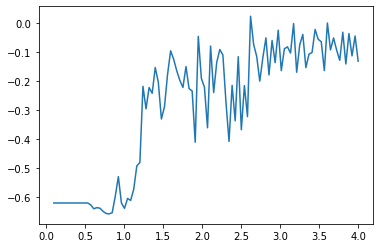

In [8]:
plt.plot(Temp,Energ)
plt.show()

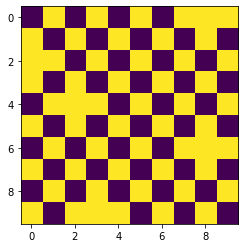

In [9]:
plt.imshow(Malla)
plt.show()

1.2030303030303031


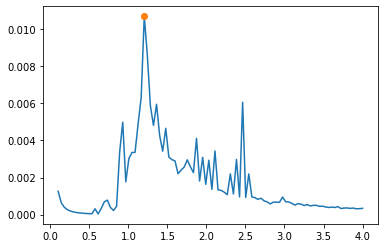

In [10]:
'''Calculo el calor especifico, ubico el punto maximo y con eso busco la temperatura de transcision (Aproximacion)'''

Calor = []
for i in range(len(Temp)):
    T = Temp[i]
    A = Energ_CM[i]
    B = Energ[i]**2
    C = (A-B)/T**2
    Calor.append(C)

MaximoY = max(Calor)
MaximoX = Calor.index(MaximoY)
Temperaturas = barrido[MaximoX]

print(Temperaturas)
plt.plot(Temp,Calor)
plt.plot(Temperaturas,MaximoY,'o')
plt.show()

In [11]:
'''Genero la animacion, con la linea comentada puedo guardarla como .gif'''

%matplotlib auto

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

fig1 = plt.figure()

def animacion1 (i):
    plt.imshow(Mallas_evo[i])

grafica = animation.FuncAnimation(fig1,animacion1,range(len(Mallas_evo)))
# grafica.save('Grafica047.gif')
grafica

Using matplotlib backend: Qt5Agg
